# What are the job prospects for becoming a Data Analyst?
    
    #Which companies and locations have the best salary expections? ratings?
    #Correlation between Job Title and salary offered by the company?
    #Correlation between the size of the company and the salary?
    #Correlation between the ratings and salary?
    

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress
import scipy.stats as st

In [24]:
# Load in file
file1 = "..\DataAnalystJobProspects\DataAnalyst.csv"

# Explore DataSet

In [25]:
#Read and display the CSV with Pandas
old_data = pd.read_csv(file1)


# Clean DataSet

In [26]:
#Remove Unnamed Column
data = old_data.drop(columns=['Unnamed: 0', 'Job Description', 'Headquarters', 'Founded', 'Competitors', 'Revenue', "Easy Apply"])


In [27]:
#Remove missing values. Replace all missing values in dataset
#data.dropna(inplace = True) only returns 28 values
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [28]:
try_this = data['Job Title'].str.split(',', n=1)
data['Job Title'],data['Department'] = try_this.str[0], try_this.str[1]

data.drop(columns = ["Department"], inplace = True)

In [29]:
try_it = data['Company Name'].str.split('\n', n=1)
data['Company Name'],data['R2'] = try_it.str[0], try_it.str[1]
                                                            
data.drop(columns = ["R2"], inplace = True)

In [30]:
by_salary = data['Salary Estimate'].str.split('(', n=1)
data['Salary Estimate'],data['Glass'] = by_salary.str[0], by_salary.str[1]

data.drop(columns = ["Glass"], inplace = True)

data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [31]:
split_salary = data['Salary Estimate'].str.split('-', n=1)
data['Minimum Salary'],data['Maximum Salary'] = by_salary.str[0], by_salary.str[1]

In [32]:
# new data frame with split value columns 
new = data["Salary Estimate"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Minimum Salary"]= new[0] 
  
# making separate last name column from new data frame 
data["Maximum Salary"]= new[1] 

data.drop(columns = ["Salary Estimate"], inplace = True) 

In [33]:
data['Minimum Salary']=data['Minimum Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Maximum Salary']=data['Maximum Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

# Companies with ratings of 3 or more

In [34]:
data_filtered = data[data['Rating']>= 3]

# Data Visualization

In [35]:
mean_salary_df = data_filtered.groupby('Job Title').mean()[['Minimum Salary', 'Maximum Salary']]
mean_salary_df

,Minimum Salary,Maximum Salary
Job Title,,
#104252 Division Data and Financial Analyst,34.0,61.0
#105009 Research Data Analyst,60.0,124.0
(Data Analyst) BA/BSA,45.0,78.0
(Data Risk Analyst: Data Modeler),35.0,67.0
(REMOTE) Sr. Risk Analyst (IT,73.0,89.0
...,...,...
Workforce Data Analyst,42.0,76.0
XYZ Data Analyst,29.0,38.0
a. Senior Data and Business Analyst,31.0,59.0


In [37]:
minimum_salary_mean = data["Minimum Salary"].mean()
minimum_salary_mean

54.242787394585

In [38]:
maximum_salary_mean = data["Maximum Salary"].mean()
maximum_salary_mean

89.93919218819352

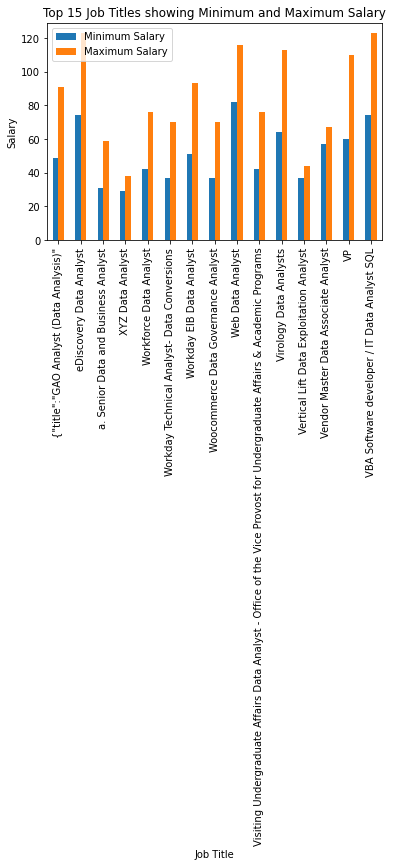

In [39]:
mean_salary_df.sort_values(by='Job Title', ascending=False)[:15].plot(kind='bar')
plt.title("Top 15 Job Titles showing Minimum and Maximum Salary")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.savefig('../DataAnalystJobProspects/visualizations/Salary.png', bbox_inches="tight")
plt.show()

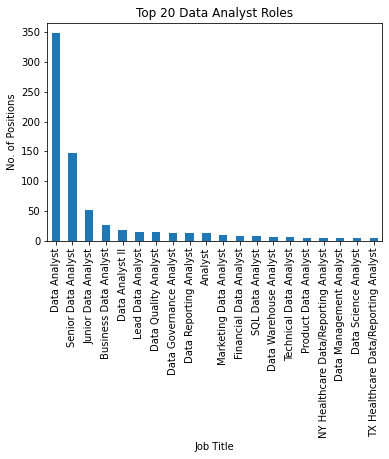

In [40]:
data_filtered = data_filtered.replace({
    
    "Sr. Data Analyst": "Senior Data Analyst", 
    "Sr Data Analyst": "Senior Data Analyst",
    "Master Data Analyst" : "Senior Data Analyst",
    'Sr Analyst': "Senior Data Analyst",
    "Sr. Analyst" : "Senior Data Analyst",
    "Senior Analyst" : "Senior Data Analyst",
    "Data Analyst Junior" : "Junior Data Analyst",
    "Data Analyst I" : "Junior Data Analyst",
    "Data Analyst 3" : 'Senior Data Analyst' ,
    "Data Analyst III" : "Senior Data Analyst"
    })
job_count = data_filtered["Job Title"].value_counts()
job_count.sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("Top 20 Data Analyst Roles")
plt.xlabel("Job Title")
plt.ylabel("No. of Positions")
plt.savefig('../DataAnalystJobProspects/visualizations/Top20DataAnalystRoles.png', bbox_inches="tight")
plt.show()

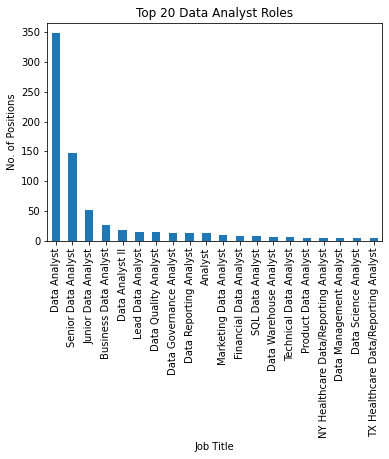

In [41]:
job_count = data_filtered["Job Title"].value_counts()
job_count.sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("Top 20 Data Analyst Roles")
plt.xlabel("Job Title")
plt.ylabel("No. of Positions")
plt.savefig('../DataAnalystJobProspects/visualizations/Top20DataAnalystRoles.png', bbox_inches="tight")
plt.show()

In [42]:
title_count = data_filtered["Job Title"].value_counts()
title_count

Data Analyst                                    348
Senior Data Analyst                             147
Junior Data Analyst                              51
Business Data Analyst                            26
Data Analyst II                                  18
                                               ... 
Clinical Practice Data Analyst Specialist         1
Research Analyst (Data Science)                   1
Electronic Trading Data Analyst                   1
Data Governance Business Information Analyst      1
Lead Generation Data Analyst                      1
Name: Job Title, Length: 938, dtype: int64

In [43]:
job_salary = data_filtered.groupby('Job Title')
job_salary

In [44]:
sector = data_filtered["Sector"].value_counts()
sector

Information Technology                528
Business Services                     464
Finance                               149
Health Care                           133
Education                              49
Insurance                              46
Media                                  40
Accounting & Legal                     39
Manufacturing                          30
Retail                                 28
Biotech & Pharmaceuticals              27
Government                             23
Non-Profit                             21
Aerospace & Defense                    21
Transportation & Logistics             15
Oil, Gas, Energy & Utilities           12
Consumer Services                      12
Real Estate                            11
Construction, Repair & Maintenance     11
Telecommunications                     11
Arts, Entertainment & Recreation        6
Restaurants, Bars & Food Services       4
Mining & Metals                         1
Travel & Tourism                  

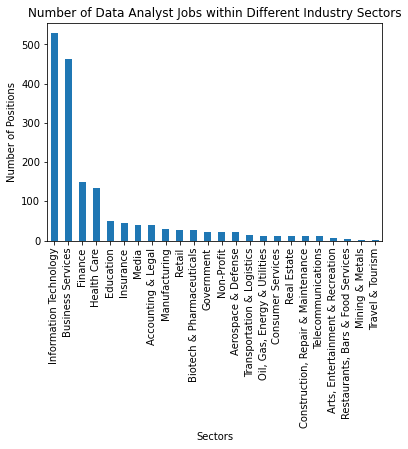

In [45]:
count_sector = sector.plot(kind='bar')

# Set the xlabel and ylabel using class methods

plt.xlabel('Sectors')
plt.ylabel('Number of Positions')
plt.title("Number of Data Analyst Jobs within Different Industry Sectors")

plt.savefig('../DataAnalystJobProspects/visualizations/DifferentIndustrySectors.png', bbox_inches="tight")
plt.show()

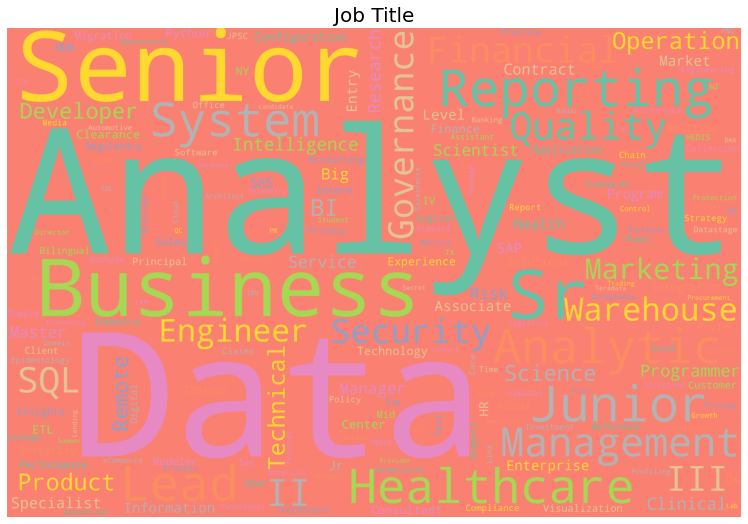

<Figure size 432x288 with 0 Axes>

In [46]:
frequent_words=data['Job Title']

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(' '.join(frequent_words))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordcloud)
plt.show()

plt.savefig('../DataAnalystJobProspects/visualizations/WordCloud.png')
wordcloud.to_file('../DataAnalystJobProspects/visualizations/WordCloud.png')
              
plt.show()

In [47]:
sector_salary = data.groupby(['Sector'])

sector_salary.head(2)

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,37,66
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66
5,Data Analyst,3.9,Point72,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,37,66
6,Business/Data Analyst (FP&A),4.4,Two Sigma,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,37,66
7,Data Science Analyst,3.7,GNY Insurance Companies,"New York, NY",201 to 500 employees,Company - Private,Insurance Carriers,Insurance,37,66
9,Data Analyst,4.4,Riskified,"New York, NY",501 to 1000 employees,Company - Private,Research & Development,Business Services,37,66
10,Data Analyst,4.0,NYU Langone Health,"New York, NY",10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,37,66


In [48]:
min_mean = sector_salary['Minimum Salary'].mean().round(3)
max_mean = sector_salary["Maximum Salary"].mean().round(3)

sector_salary_df = pd.DataFrame({'Minimum Salary Mean': min_mean,
                                'Maximum Salary Mean' : max_mean})

sector_salary_df.head()

,Minimum Salary Mean,Maximum Salary Mean
Sector,,
Accounting & Legal,58.512,91.930
Aerospace & Defense,51.955,85.045
"Arts, Entertainment & Recreation",60.429,100.857
Biotech & Pharmaceuticals,61.364,104.848
Business Services,54.405,89.866


In [49]:
groups = min_mean, max_mean
group_labels = ['Average Minimum Salary', 'Average Maximum Salary']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels)

In [50]:
df

Sector,Accounting & Legal,Aerospace & Defense,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government,...,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
Average Minimum Salary,58.512,51.955,60.429,61.364,54.405,53.812,53.143,51.808,50.645,48.056,...,51.833,41.0,49.115,48.000,57.250,39.0,49.079,51.727,53.4,57.0
Average Maximum Salary,91.930,85.045,100.857,104.848,89.866,88.125,89.857,87.327,84.645,80.583,...,85.119,78.0,82.423,78.538,104.583,69.0,84.289,89.000,85.3,67.0


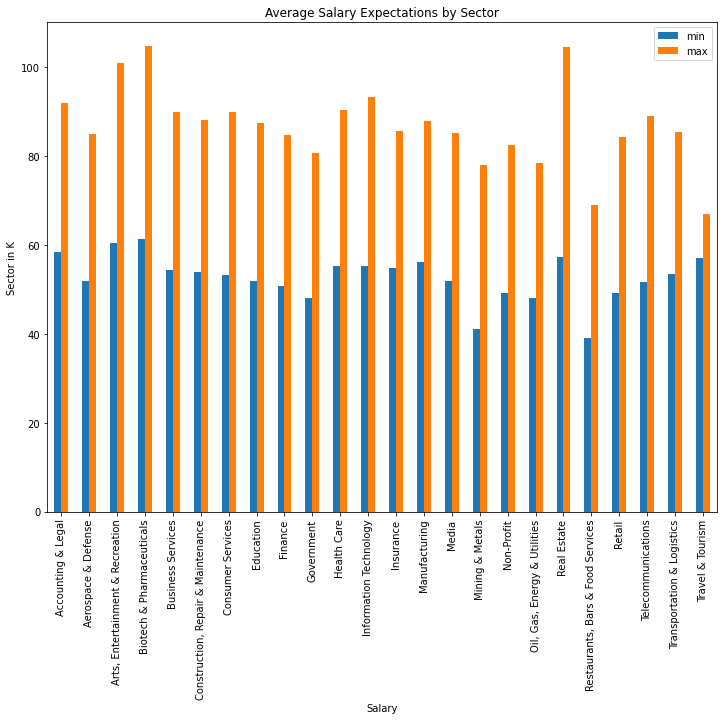

In [77]:
# Plot.
pd.concat(
    [df.min().rename('min'), 
     df.max().rename('max')],
    axis=1).plot.bar()

plt.title("Average Salary Expectations by Sector")
plt.xlabel("Salary")
plt.ylabel("Sector in K")
plt.savefig('../DataAnalystJobProspects/visualizations/SalarybySector.png', bbox_inches="tight")
plt.show()

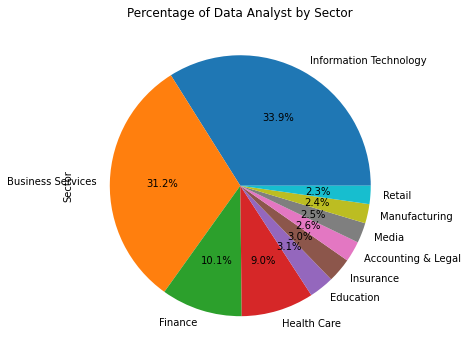

In [52]:
sector_type = data['Sector'].value_counts()
sector_type.sort_values(ascending=False)[:10].plot(kind='pie', 
                                                   subplots=True, 
                                                   figsize=(11, 6), 
                                                   autopct='%1.1f%%')
# Labels for the sections of our pie chart
plt.title("Percentage of Data Analyst by Sector")

plt.savefig('../DataAnalystJobProspects/visualizations/PercentageofDataAnalystbySector.png', bbox_inches="tight")
plt.show()

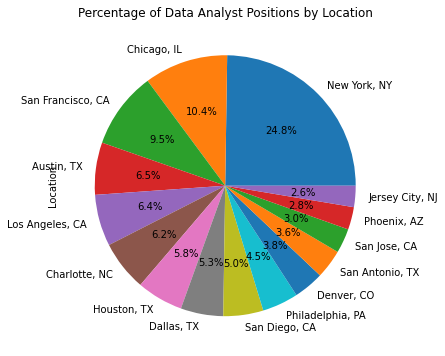

In [53]:
location_type = data['Location'].value_counts()

location_type.sort_values(ascending=False)[:15].plot(kind='pie', 
                                                     subplots=True,
                                                     figsize=(11, 6), 
                                                     autopct='%1.1f%%')
# Labels for the sections of our pie chart

plt.title("Percentage of Data Analyst Positions by Location")

plt.savefig('../DataAnalystJobProspects/visualizations/PercentageofDataAnalystbyLocation.png', bbox_inches="tight")
plt.show()

In [92]:
location_rating = data.groupby(['Location'])
loc_rate = pd.DataFrame(location_rating["Rating"].mean()).reset_index()
loc_rate.head()

,Location,Rating
0,"Addison, TX",4.30
1,"Alachua, FL",3.30
2,"Alameda, CA",4.60
3,"Alhambra, CA",2.95
4,"Allegheny West, PA",3.80


In [91]:
rate_loc = loc_rate.sort_values(by='Rating', ascending=False)
rate_loc.head()

,Location,Rating
182,"Portsmouth, VA",4.90
11,"Athens, GA",4.80
64,"Dublin, OH",4.75
2,"Alameda, CA",4.60
56,"Daly City, CA",4.60


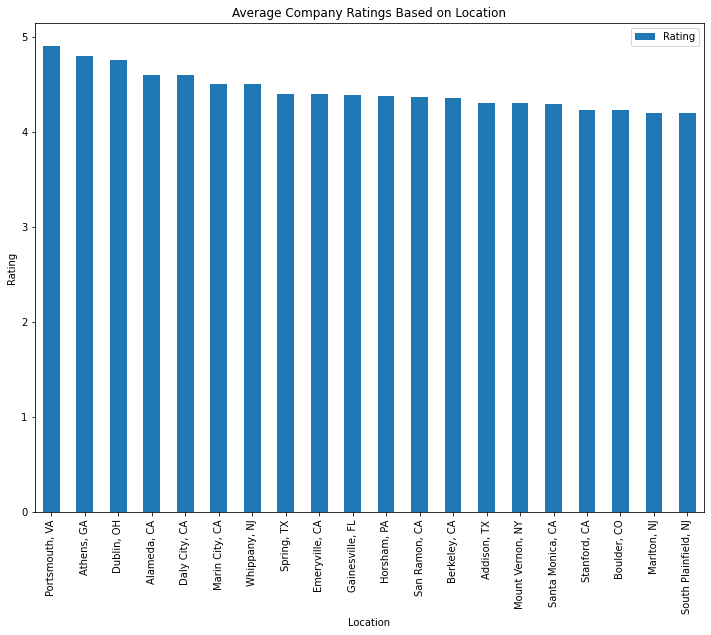

In [95]:
labels = []
indexes = []
for index, row in rate_loc.reset_index().iterrows():
    labels.append(row["Location"])
    indexes.append(index)
rate_loc.sort_values(by='Rating', ascending=False)[:20].plot(kind='bar')
plt.title("Average Company Ratings Based on Location")
plt.xlabel("Location")         
plt.xticks(indexes[:20], labels[:20])
plt.ylabel("Rating") 


plt.savefig('../DataAnalystJobProspects/visualizations/AverageCompanyRatingsBasedonLocation.png', bbox_inches="tight")
plt.show()

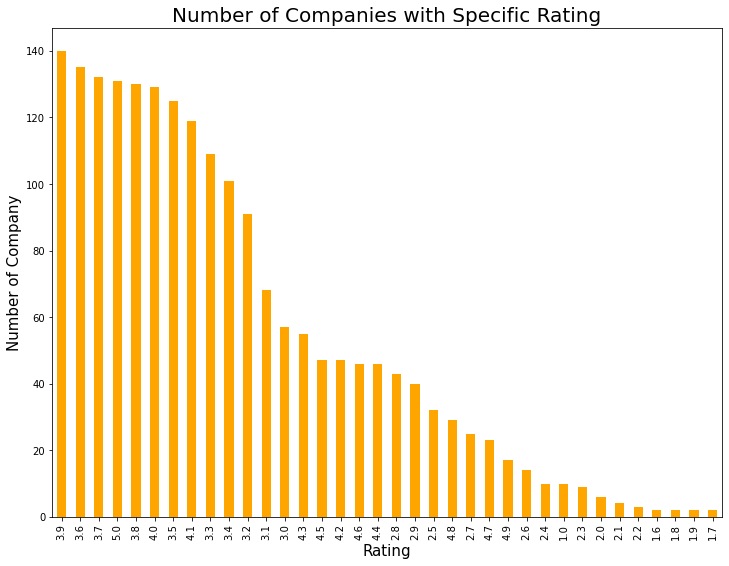

In [90]:
data['Rating'] = data['Rating'].replace(-1,np.NaN)
data['Rating'].value_counts().plot.bar(x='Rating',y='Number of Companies',color='orange')
plt.title("Number of Companies with Specific Rating",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Number of Company",fontsize=15)

plt.savefig('../DataAnalystJobProspects/visualizations/CompanieswithSpecificRatin.png', bbox_inches="tight")
plt.show()